In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv(r'D:\prodigyDS05\bangalore-cas-alerts.csv', encoding='utf-8', delimiter=',')
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")

# Display basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207617 entries, 0 to 207616
Data columns (total 7 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   deviceCode_deviceCode               207617 non-null  int64  
 1   deviceCode_location_latitude        207617 non-null  float64
 2   deviceCode_location_longitude       207617 non-null  float64
 3   deviceCode_location_wardName        207617 non-null  object 
 4   deviceCode_pyld_alarmType           207617 non-null  object 
 5   deviceCode_pyld_speed               207617 non-null  int64  
 6   deviceCode_time_recordedTime_$date  207617 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 11.1+ MB
None


In [7]:
df['deviceCode_time_recordedTime_$date'] = pd.to_datetime(df['deviceCode_time_recordedTime_$date'])

In [8]:
df['recorded_date'] = df['deviceCode_time_recordedTime_$date'].dt.date
df['recorded_time'] = df['deviceCode_time_recordedTime_$date'].dt.time


In [9]:
# Summary statistics
summary_stats = df.describe()
summary_stats

,deviceCode_deviceCode,deviceCode_location_latitude,deviceCode_location_longitude,deviceCode_pyld_speed
count,2.076170e+05,207617.000000,207617.000000,207617.000000
mean,8.641368e+14,12.970551,77.721926,22.198341
std,2.877346e+11,0.027337,0.029808,13.750137
min,8.620100e+14,12.686663,77.508179,0.000000
25%,8.639770e+14,12.956460,77.707352,11.000000
50%,8.639770e+14,12.973270,77.727448,22.000000
75%,8.645040e+14,12.987865,77.743668,32.000000
max,8.645040e+14,13.070075,77.806824,83.000000


In [10]:
means = df.mean(numeric_only=True)  # Specify numeric_only=True to silence the warning
medians = df.median(numeric_only=True)  # Specify numeric_only=True to silence the warning
std_devs = df.std(numeric_only=True)  # Specify numeric_only=True to silence the warning
means
medians
std_devs

deviceCode_deviceCode            2.877346e+11
deviceCode_location_latitude     2.733704e-02
deviceCode_location_longitude    2.980799e-02
deviceCode_pyld_speed            1.375014e+01
dtype: float64

In [11]:
missing_values = df.isnull().sum()
missing_values

deviceCode_deviceCode                 0
deviceCode_location_latitude          0
deviceCode_location_longitude         0
deviceCode_location_wardName          0
deviceCode_pyld_alarmType             0
deviceCode_pyld_speed                 0
deviceCode_time_recordedTime_$date    0
recorded_date                         0
recorded_time                         0
dtype: int64

Text(0.5, 1.0, 'Boxplot of Speed (No Outliers)')

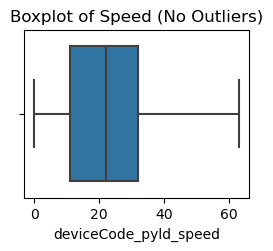

In [12]:
# Identify and handle outliers
lower_bound = df['deviceCode_pyld_speed'].quantile(0.25) - 1.5 * (df['deviceCode_pyld_speed'].quantile(0.75) - df['deviceCode_pyld_speed'].quantile(0.25))
upper_bound = df['deviceCode_pyld_speed'].quantile(0.75) + 1.5 * (df['deviceCode_pyld_speed'].quantile(0.75) - df['deviceCode_pyld_speed'].quantile(0.25))

df_no_outliers = df[(df['deviceCode_pyld_speed'] >= lower_bound) & (df['deviceCode_pyld_speed'] <= upper_bound)]

# Create boxplot after handling outliers
plt.subplot(2, 2, 2)
sns.boxplot(x=df_no_outliers['deviceCode_pyld_speed'])
plt.title('Boxplot of Speed (No Outliers)')


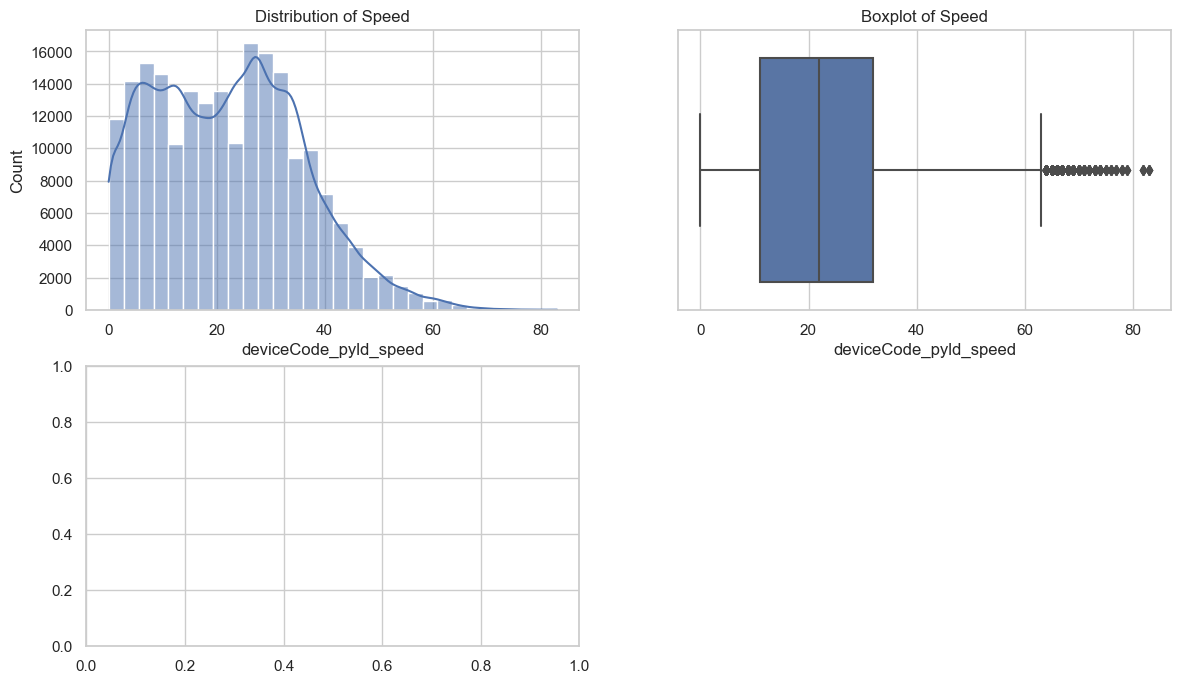

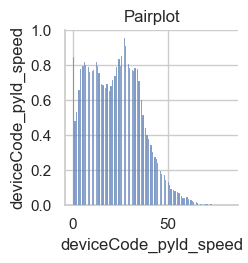

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Example: Distribution of 'deviceCode_pyld_speed'
plt.subplot(2, 2, 1)
sns.histplot(df['deviceCode_pyld_speed'], bins=30, kde=True)
plt.title('Distribution of Speed')

# Example: Boxplot of 'deviceCode_pyld_speed'
plt.subplot(2, 2, 2)
sns.boxplot(x=df['deviceCode_pyld_speed'])
plt.title('Boxplot of Speed')

# Example: Pairplot for numerical variables
plt.subplot(2, 2, 3)
sns.pairplot(df[['deviceCode_pyld_speed', 'deviceCode_time_recordedTime_$date']])
plt.title('Pairplot')

# Explicitly show the figure
plt.show()

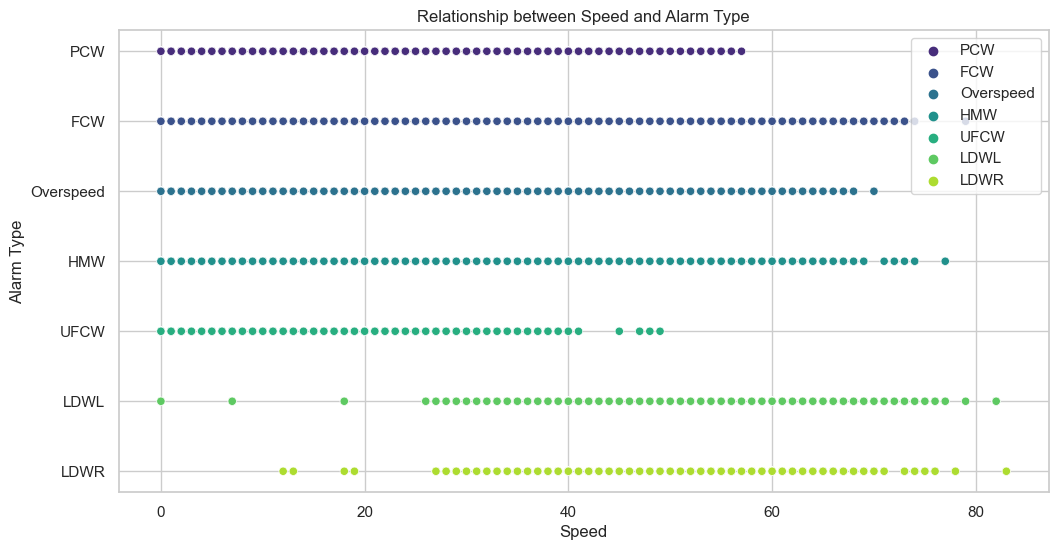

In [14]:
# Scatter plot: Relationship between speed and alarm type
plt.figure(figsize=(12, 6))
sns.scatterplot(x='deviceCode_pyld_speed', y='deviceCode_pyld_alarmType', data=df, hue='deviceCode_pyld_alarmType', palette='viridis')
plt.title('Relationship between Speed and Alarm Type')
plt.xlabel('Speed')
plt.ylabel('Alarm Type')
plt.legend(loc="upper right")  # Explicitly set the legend location
plt.show()


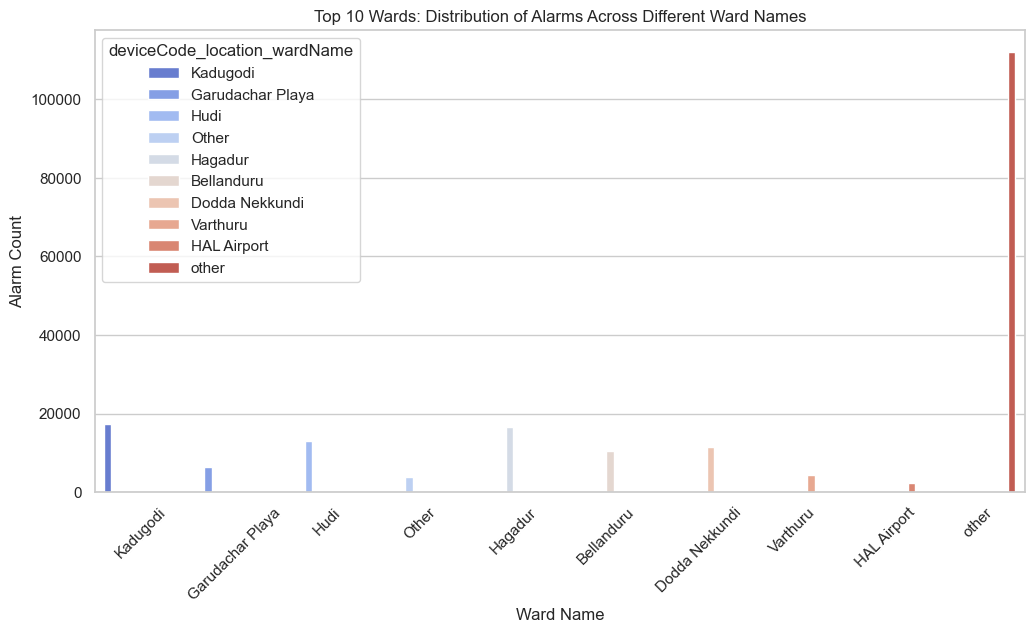

In [17]:
# Bar chart: Distribution of top N alarms across different ward names
plt.figure(figsize=(12, 6))

# Choose the top N wards to display
top_n = 10
top_n_wards = df['deviceCode_location_wardName'].value_counts().nlargest(top_n).index

# Filter the DataFrame for the top N wards
df_top_n = df[df['deviceCode_location_wardName'].isin(top_n_wards)]

# Create the countplot
sns.countplot(x='deviceCode_location_wardName', data=df_top_n, hue='deviceCode_location_wardName', palette='coolwarm')

plt.title(f'Top {top_n} Wards: Distribution of Alarms Across Different Ward Names')
plt.xlabel('Ward Name')
plt.ylabel('Alarm Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


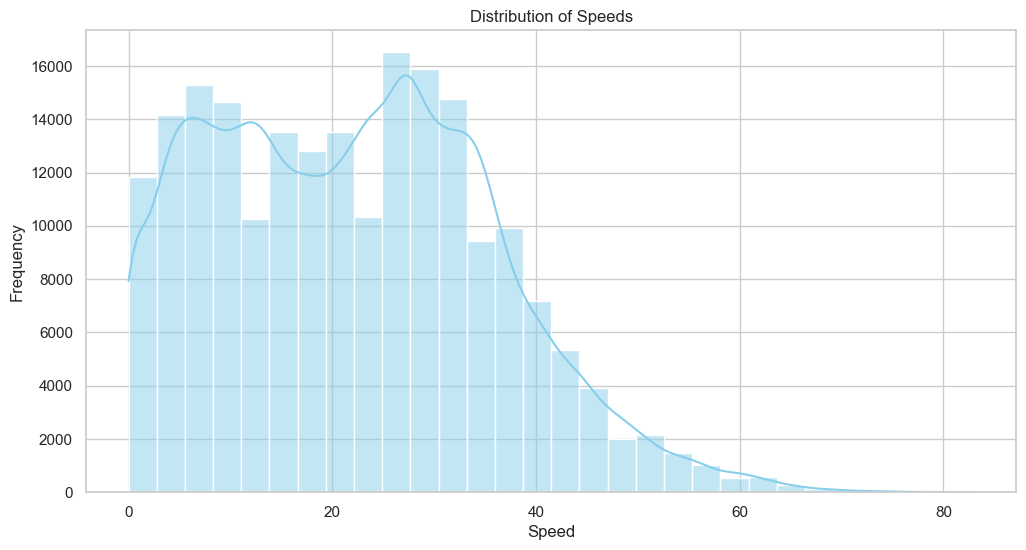

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(df['deviceCode_pyld_speed'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Speeds')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.show()

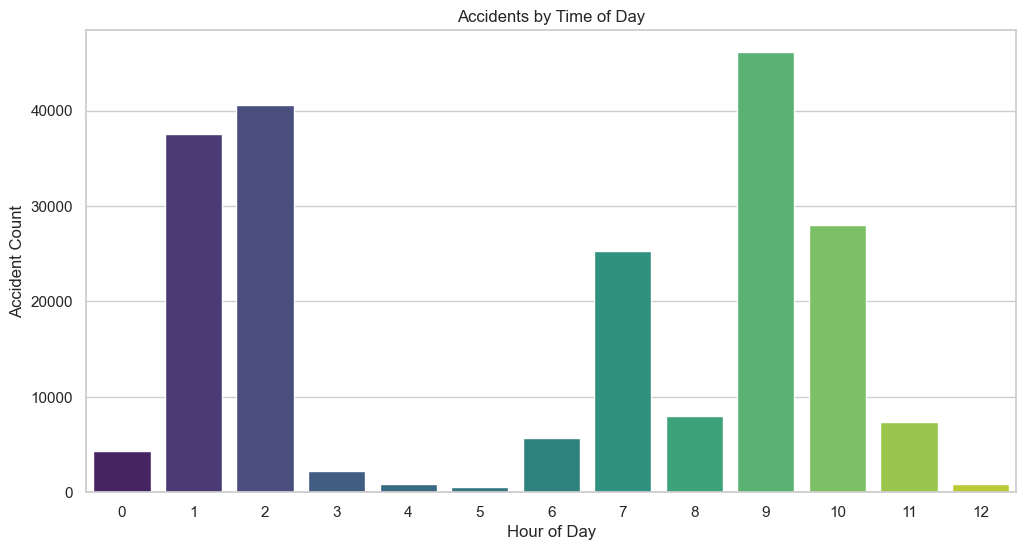

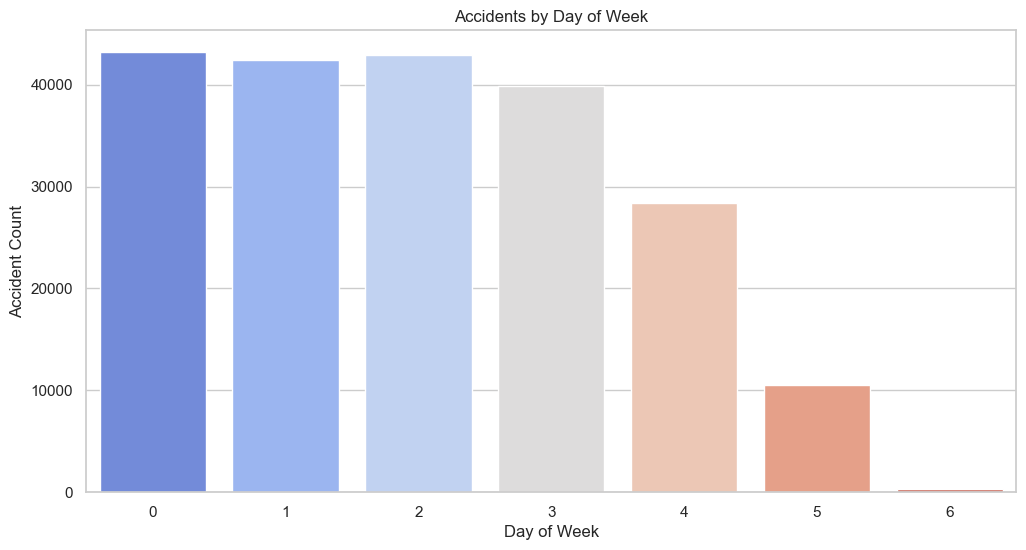

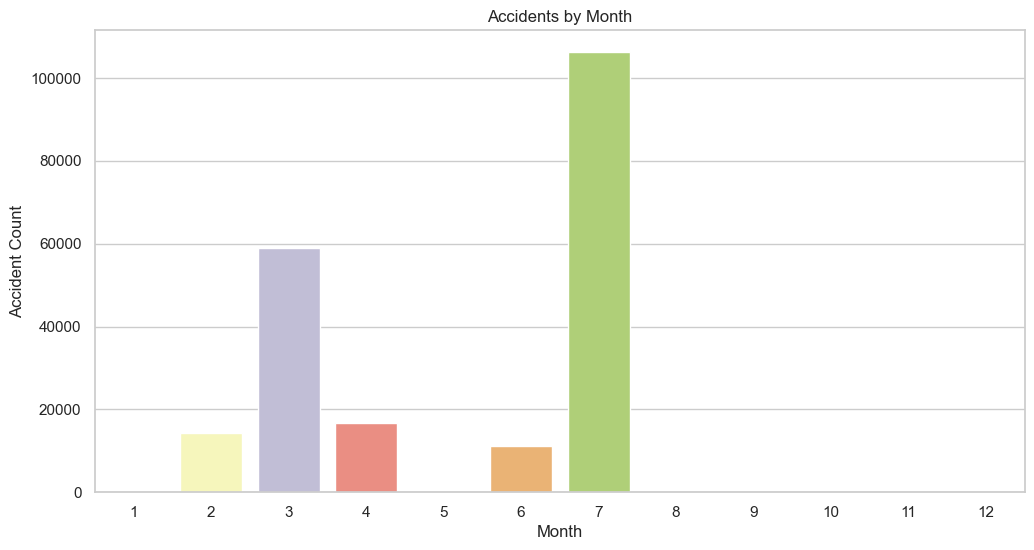

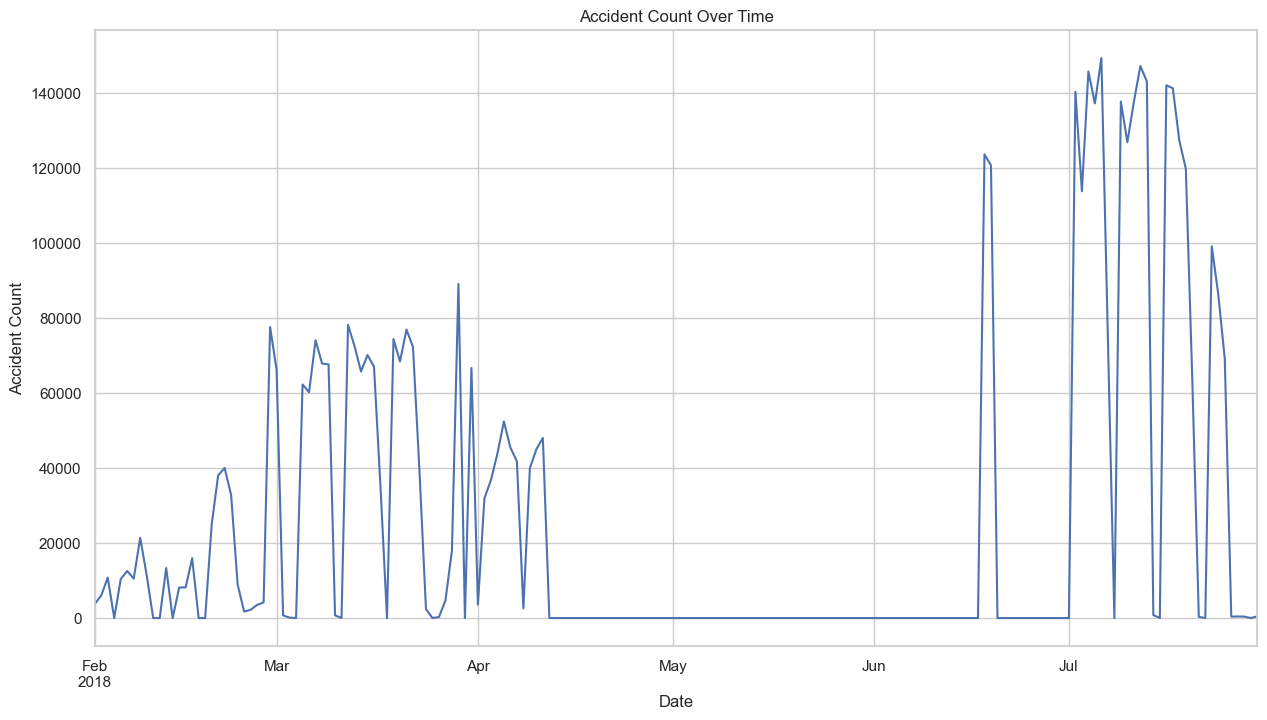

In [26]:
# Time analysis
df['deviceCode_time_recordedTime_$date'] = pd.to_datetime(df['deviceCode_time_recordedTime_$date'])

# Extract features from the timestamp
df['hour'] = df['deviceCode_time_recordedTime_$date'].dt.hour
df['day_of_week'] = df['deviceCode_time_recordedTime_$date'].dt.dayofweek  # Monday is 0 and Sunday is 6
df['month'] = df['deviceCode_time_recordedTime_$date'].dt.month

# Time of Day Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df, palette='viridis')
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Accident Count')
plt.show()

# Day of Week Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=df, palette='coolwarm', order=range(7))
plt.title('Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Accident Count')
plt.show()

# Month Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df, palette='Set3', order=range(1, 13))
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.show()

# Time Series Plot
plt.figure(figsize=(15, 8))
df.set_index('deviceCode_time_recordedTime_$date')['deviceCode_pyld_speed'].resample('D').sum().plot()
plt.title('Accident Count Over Time')
plt.xlabel('Date')
plt.ylabel('Accident Count')
plt.show()

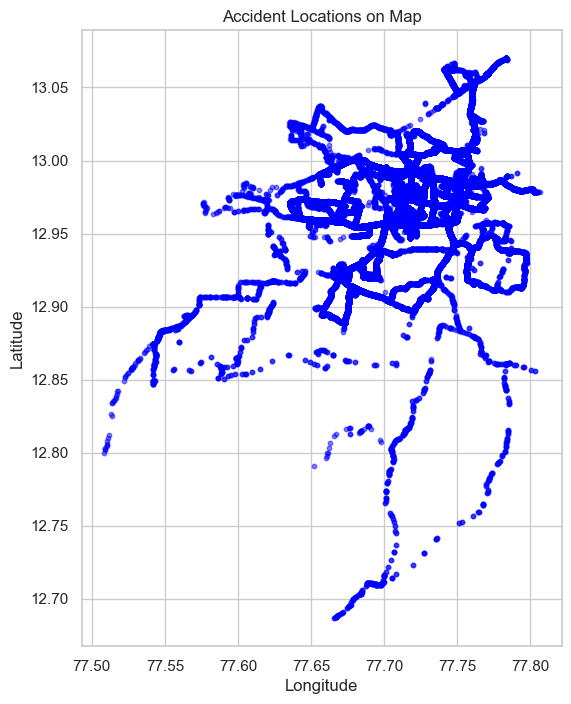

c:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


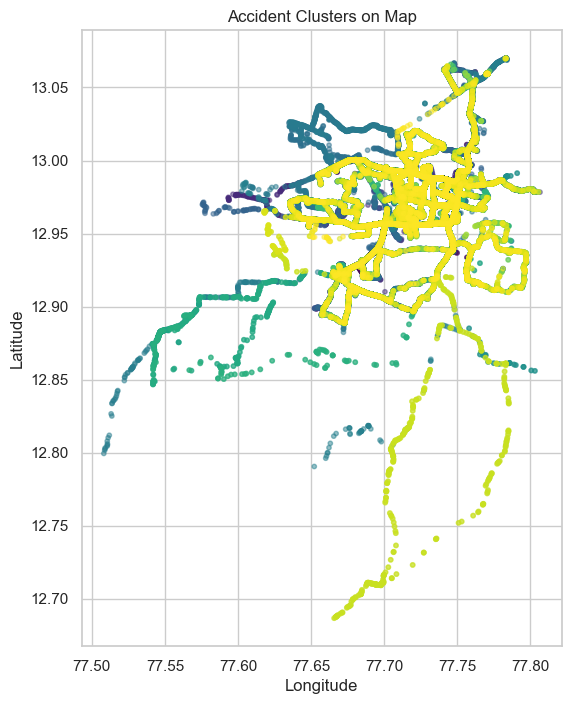

Please run KMeans clustering to generate the 'cluster' column.


In [33]:
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with geospatial data
# Replace column names with actual names from your dataset

# Create a GeoDataFrame from latitude and longitude columns
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['deviceCode_location_longitude'], df['deviceCode_location_latitude']))

# Plot the accidents on a map
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, markersize=10, color='blue', alpha=0.5)
plt.title('Accident Locations on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Use KMeans clustering to identify accident hotspots
kmeans = KMeans(n_clusters=5, random_state=42)
gdf['cluster'] = kmeans.fit_predict(gdf[['deviceCode_location_longitude', 'deviceCode_location_latitude']])

# Plot the clusters on the map
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, markersize=10, c=gdf['cluster'], cmap='viridis', alpha=0.5, legend=True)
plt.title('Accident Clusters on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Create an interactive map with folium
m = folium.Map(location=[df['deviceCode_location_latitude'].mean(), df['deviceCode_location_longitude'].mean()], zoom_start=12)

# Check if 'cluster' column exists in the DataFrame
if 'cluster' in df.columns:
    # Add MarkerCluster to the map
    marker_cluster = MarkerCluster().add_to(m)

    # Add each accident location to the map
    for index, row in df.iterrows():
        folium.Marker([row['deviceCode_location_latitude'], row['deviceCode_location_longitude']], popup=f"Cluster: {row['cluster']}").add_to(marker_cluster)

    # Display the map
    m.save('accident_map.html')
else:
    print("Please run KMeans clustering to generate the 'cluster' column.")


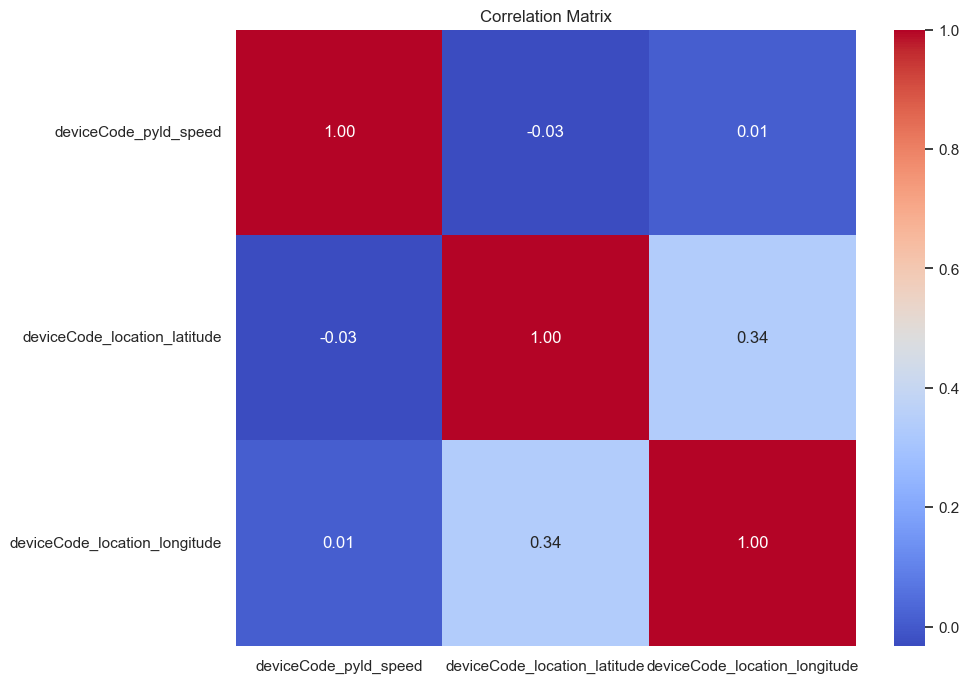

In [34]:
columns_of_interest = [
    'deviceCode_pyld_speed',  # Accident frequency
    'deviceCode_location_latitude',
    'deviceCode_location_longitude',
    # Add other columns you want to analyze
]

# Subset the DataFrame with the selected columns
correlation_df = df[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [30]:
! pip install folium

     ---------------------------------------- 97.0/97.0 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 56.3/56.3 kB 742.7 kB/s eta 0:00:00


In [28]:
! pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 6.1/6.1 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 22.9/22.9 MB 8.5 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 9.1 MB/s eta 0:00:00
